ChEn-3170: Computational Methods in Chemical Engineering Fall 2018 UMass Lowell; Prof. V. F. de Almeida **05Nov2018**

# 15. Continuous Stirred-Tank Reactor w/ Heating 
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents
* [Data](#data)
* [Degrees of Freedom](#dof)
* [Total Mass Balance](#mb)
* [Species Mass Balance](#smb)
* [Energy Balance](#eb)
* [Final Comments](#fc)
---

## Data<a id="data"></a>

This problem was provided by Prof. Donatelli (2018) from ChEn-4130 Process Control class.

Name                        | Parameter     | Value                | Unit              |
----------------------------|----------------------------------------------------------| 
mass flow rate              | w             | 10                   | kg/s              | 
inflow concentration of A   | $c_{Ai}$      | 1.2                  | kgmol/$\text{m}^3$| 
inflow concentration of B   | $c_{Bi}$      | 0.0                  | kgmol/$\text{m}^3$| 
inflow temperature          | $T_i$         | 425                  | K                 | 
holdup volume               | $V$           | 0.2                  | $\text{m}^3$      | 
mass density                | $\rho$        | 1000                 | kg/$\text{m}^3$   |
heat capacity               | $C$           | 4184                 | J/(kg K)          |
heat of reaction            | $\Delta H_R$  | $6.69 \times 10^8$   | J/kgmol           |
activation temperature      | $E/R$         | 20000                | K                 |
Arrhenius frequency         | $k_0$         | $1.97\times 1024$    | $\text{s}^{-1}$   |
S.S.    reactor temperature | $T(\infty)$   | 350                  | K                 |

Note that this is an endothermic reaction A -> 2B and the reactor temperature at steady state is lower than the temperature of the inflow stream.

## Degrees of Freedom<a id="dof"></a>
There exists three equations (below), the total mass balance forces the volumetric flow rate to be a constant because the flow is incompressible, therefore $q$ must be specified. There exists three unknowns, namely the molarity of species A, $c_A(t)$, and B, $c_B(t)$, and the temperature of the reactor, $T(t)$. Therefore there are as many unknowns as there are equations and the problem is potentially solvable given the initial conditions for the unknowns, and all the values of the parameters in the foregoing table.

## Total Mass Balance<a id="mb"></a>

\begin{equation*}
q = q_i = \text{constant} 
\end{equation*}


## Species Mass Balance<a id="smb"></a>

\begin{equation*}
V\,\frac{dc_A}{dt} = q\bigl(c_{Ai}-c_A\bigr) - V\,k\,c_A ,\\
V\,\frac{dc_B}{dt} = q\bigl(c_{Bi}-c_B\bigr) + V\,2\,k\,c_A ,
\end{equation*}

where $k = k_0\,e^{\frac{-E}{R\,T}}$.

## Energy Balance<a id="eb"></a>

\begin{equation*}
V\,\rho C\,\frac{dT}{dt} = w\,C\,\bigl(T_i-T\bigr) + \bigl(-\Delta H_R\bigr)\,V\,k\,c_A + Q
\end{equation*}

where $w$ is the mass flow rate $w = \rho\,q$.

## Steady State Concentration of A<a id="ssa"></a>

From the species mass balance

\begin{equation*}
c_A(\infty) = \frac{q\,c_{Ai}}{V\,k + q}
\end{equation*}

## Steady State Concentration of B<a id="ssa"></a>

From the species mass balance

\begin{equation*}
c_B(\infty) = c_{Bi} + \frac{V\,2\,k\,c_A}{q}
\end{equation*}

## Steady State Temperature<a id="ssa"></a>

From the energy balance

\begin{equation*}
Q = w\,C\,\bigl(T(\infty)-T_i\bigr) + \Delta H_R\,V\,k\,c_A
\end{equation*}

In [21]:
'''Parameters'''

w_flow          =   10.0      # kgmol/s
c_ai            =   1.2       # kgmol/m^3
c_bi            =   0.0       # kgmol/m^3
temp_i          =   425.0     # K
volume          =   0.2       # m^3
rho             =   1000.0    # kg/m^3
heat_capacity   =   4184.0    # J/kg/K
enthalpy_rxn    =   6.69e8    # J/kgmol
energy_a_over_r =   20000.0   # K
k_0             =   1.97e24   # 1/s
temp_infty      =   350.0     # K

time_final = 150 # s

In [22]:
'''Steady state concentration of A'''

import math
q_flow = w_flow/rho
k_cte = k_0 * math.exp( -energy_a_over_r/temp_infty )
c_a_infty = q_flow * c_ai / (volume*k_cte + q_flow)

print('c_A(S.S.) = %5.5e [kgmol/m^3]'%c_a_infty)

c_A(S.S.) = 1.71254e-01 [kgmol/m^3]


In [23]:
'''Steady state concentration of B'''

c_b_infty = c_bi + volume * 2 * k_cte * c_a_infty / q_flow

print('c_B(S.S.) = %5.5e [kgmol/m^3]'%c_b_infty)

c_B(S.S.) = 2.05749e+00 [kgmol/m^3]


In [24]:
'''Steady state heating power'''

q_heat_power_ss = w_flow * heat_capacity * (temp_infty - temp_i) + enthalpy_rxn * volume * k_cte * c_a_infty

print('Q(S.S.) = %5.5e [kW]'%(q_heat_power_ss/1000))

Q(S.S.) = 3.74431e+03 [kW]


Heat is provided to the system to keep the reactor temperature from dropping too far below the inflow temperature.

In [25]:
'''RHS of ODEs'''

def rhs_fn( t, u_vec,
            volume, q_flow, c_ai, c_bi, k_0, energy_a_over_r,
            rho, heat_capacity, temp_i, enthalpy_rxn, q_heat_power  ):
    
    c_a  = u_vec[0]
    c_b  = u_vec[1]
    temp = u_vec[2]
    
    assert temp >= 0.0
    import math

    k = k_0 * math.exp(-energy_a_over_r/temp)
    
    du_dt_0 = q_flow/volume*(c_ai - c_a) - k * c_a
    
    du_dt_1 = q_flow/volume*(c_bi - c_b) + 2 * k * c_a
    
    w_flow = rho*q_flow
    
    du_dt_2 =   w_flow/volume/rho*(temp_i - temp) \
              - enthalpy_rxn/rho/heat_capacity * k * c_a \
              + q_heat_power/rho/volume/heat_capacity
    
    return [du_dt_0, du_dt_1, du_dt_2]

In [26]:
'''Algorithm paraters'''

n_time_steps = 50 # number of solution values in time
max_n_steps_per_time_step = 100 # max number of nonlinear algebraic solver iterations per time step

In [27]:
'''Read experimental data'''

import numpy as np

t_stamps = np.linspace(0.0, time_final, num=n_time_steps)

In [28]:
'''Solve ODE system'''

from scipy.integrate import odeint

max_n_steps_per_time_step = 100

# inflow condition change
c_ai   = 1.0
temp_i = 440.0

u_vec_0    = np.zeros(3,dtype=np.float64)
u_vec_0[0] = c_a_infty
u_vec_0[1] = c_b_infty
u_vec_0[2] = temp_infty

(u_vec_history, info_dict) = odeint( rhs_fn, u_vec_0, t_stamps,
                                     args=( volume, q_flow, c_ai, c_bi, k_0, energy_a_over_r,
                                     rho, heat_capacity, temp_i, enthalpy_rxn, q_heat_power_ss ),
                                     rtol=1e-7, atol=1e-7, mxstep=max_n_steps_per_time_step,
                                     full_output=True, tfirst=True )

assert info_dict['message']=='Integration successful.',\
            'Fatal: scipy.integrate.odeint failed %r'%info_dict['message']

print('       Time [s]    c_A [kgmol/m^3]  c_B [kgmol/m^3]     T [K]' )
idx = 0
for (t,u) in zip(t_stamps,u_vec_history):
    if idx%5 == 0:
        print('%15.3e %15.3e %15.3e %15.3e'%(t,u[0],u[1],u[2]))
    idx += 1

       Time [s]    c_A [kgmol/m^3]  c_B [kgmol/m^3]     T [K]
      0.000e+00       1.713e-01       2.057e+00       3.500e+02
      1.531e+01       5.696e-02       2.072e+00       3.568e+02
      3.061e+01       2.180e-02       2.043e+00       3.629e+02
      4.592e+01       1.209e-02       2.016e+00       3.668e+02
      6.122e+01       8.947e-03       2.001e+00       3.688e+02
      7.653e+01       7.743e-03       1.993e+00       3.698e+02
      9.184e+01       7.234e-03       1.990e+00       3.703e+02
      1.071e+02       7.007e-03       1.988e+00       3.705e+02
      1.224e+02       6.904e-03       1.987e+00       3.706e+02
      1.378e+02       6.856e-03       1.987e+00       3.706e+02


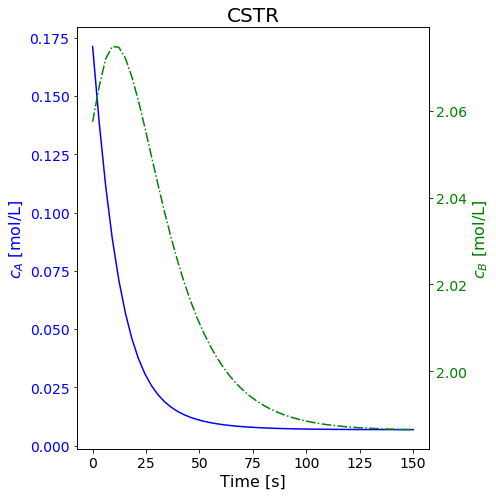

In [29]:
import matplotlib.pyplot as plt
    
fig, ax1 = plt.subplots(1, figsize=(7, 7))
ax1.plot(t_stamps,u_vec_history[:,0],'b-',label='$T_i=$ '+str(temp_i) )

ax1.set_xlabel(r'Time [s]',fontsize=16)
ax1.set_ylabel(r'$c_A$ [mol/L]',fontsize=16,color='blue')
ax1.tick_params(axis='y', labelcolor='blue', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)
#ax1.legend(loc='best',fontsize=12)
#ax1.grid(True)
ax2 = ax1.twinx() 
ax2.plot(t_stamps,u_vec_history[:,1],'g-.',label='$T_i=$ '+str(temp_i) )
ax2.set_ylabel(r'$c_B$ [mol/L]',fontsize=16,color='green')
ax2.tick_params(axis='y', labelcolor='green', labelsize=14)
#ax2.legend(loc='best',fontsize=12)
#ax2.grid(True)
plt.title('CSTR',fontsize=20)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
print('')


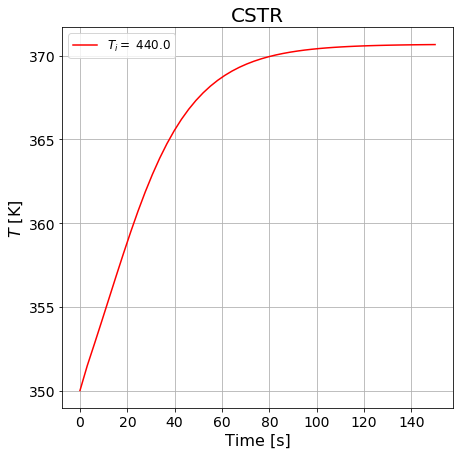

In [30]:
import matplotlib.pyplot as plt
    
plt.figure(1, figsize=(7, 7))

plt.plot(t_stamps,u_vec_history[:,2],'r-',label='$T_i=$ '+str(temp_i) )

plt.xlabel(r'Time [s]',fontsize=16)
plt.ylabel(r'$T$ [K]',fontsize=16)
plt.title('CSTR',fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()
print('')

## Final Comments<a id="fc"></a>
After the change in feed conditions the reactor reaches another steady state after 125 seconds as shown in the table and plots above.